# Predicting heart disease using ML
This notebook looks into using variour Python-base ML and data science libraries in an attempt to build a ML capable of predicting whether or not someone has heart disease baseed on thir medical attributes.

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem definition
Is a statement,
> Given clinical parameters about a patioent, can we predict whether or not they have heart disease?

# 2. Data

the original data came from the Cleavland data from the UCI ml repository. There is also a vaeriosn available on Keggle

# 3. Evaluation
> If we can reach 95% accuracy at predicting whethert or not a patrient has heart disease during the proof of concept, we'll pursue the project

# 4. Features

**Create data dictionary**

Preparing the tools
we're going to use pandas, Matplotib and Numpy for data analysis and manipulation

In [2]:
# regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models from skliearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, plot_roc_curve

In [3]:
df = pd.read_csv("../041 heart-disease.csv")
df.shape # rows, columns

(303, 14)

## Data exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export ont the dataset yore working with.
1. What question(s) are you trying to solve
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
# let's find out how many of each class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

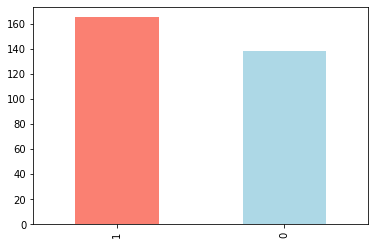

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Heart disease frequency according to Sex

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

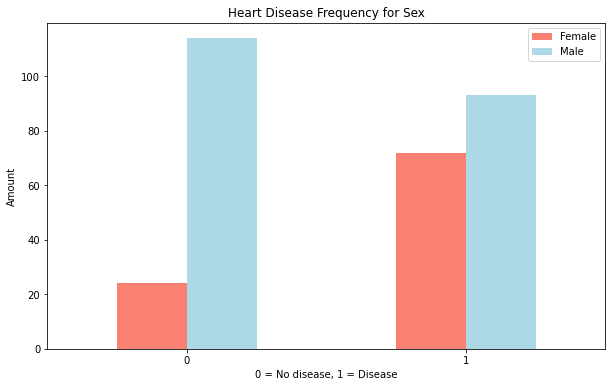

In [9]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                        figsize=(10, 6),
                                        color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

## Age vs Max Heart Rate for Heart Disease

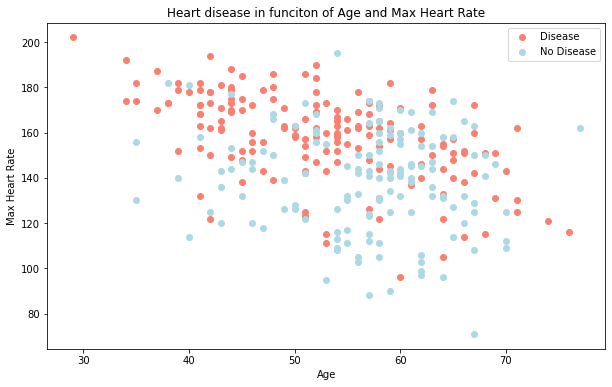

In [10]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Scatterwith negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

# Add some helpful info
plt.title('Heart disease in funciton of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

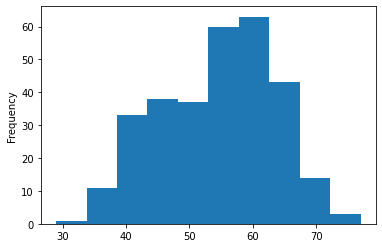

In [11]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

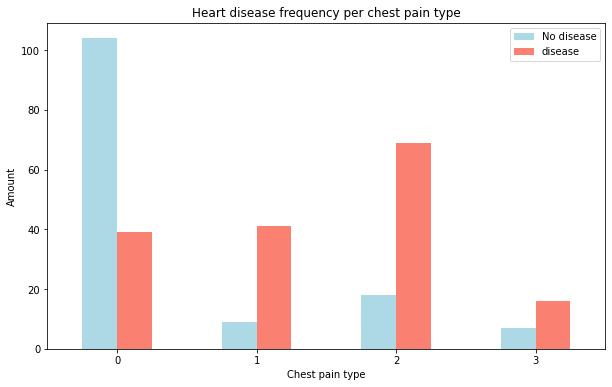

In [12]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['lightblue', "salmon"])
# Add some communication
plt.title('Heart disease frequency per chest pain type')
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "disease"])
plt.xticks(rotation=0);

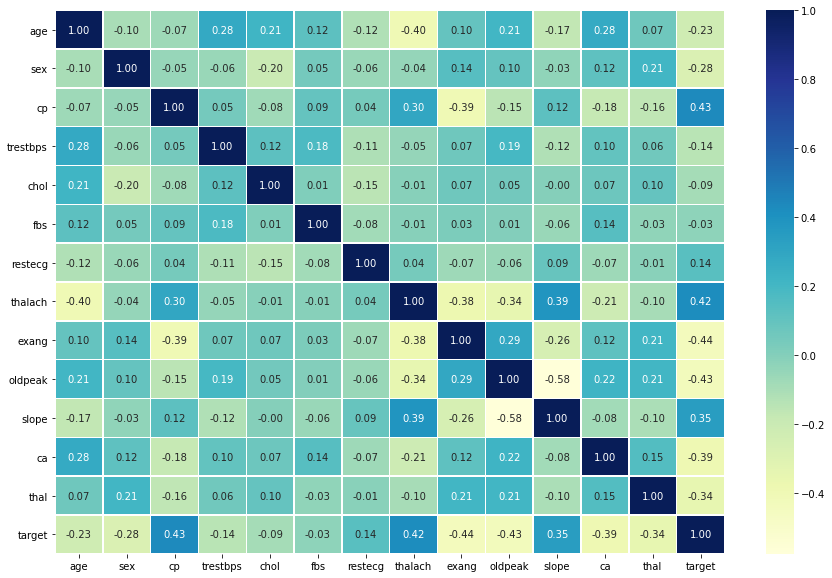

In [13]:
# Make a correlation matrix
corr_mtx = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_mtx, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

# Modelling

In [14]:
np.random.seed(42)
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We'll train it (find the patterns) on the training sets. And we'll test it (use the patterns) ont the test set.
We're going to try 3 different ML models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [15]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
            "KNN": KNeighborsClassifier(),
            "Ranodm Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given ML models.
    models : a dict of different Sciki-learn ML models
    X_test : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    '''
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [16]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Ranodm Forest': 0.8360655737704918}

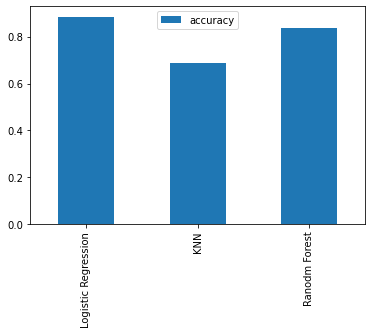

In [17]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now, we've got a baseline model and we know a model's first prediciton predicitons aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance

(specific to Classification:)
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [18]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


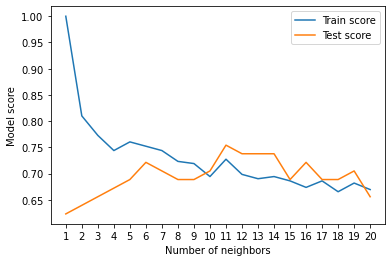

In [19]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [20]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                "solver": ['liblinear']}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
            'max_depth': [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV


In [21]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [23]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [24]:
# Tunning for RAndomForestClassifier()

np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [26]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameters Tuning with GridSearchCV
Since our LogisticRegression model provides the best score so far, we'll try and improve them again using GridSearchCV...



In [27]:
# Different Hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogistcRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [28]:
# Check the best hyperparameters
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [29]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned ML classifier, beyond accuracy

* Roc curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

TO make comparisons and evaluate our trained model, first we need to make predictions.

In [30]:
# Make predictios with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

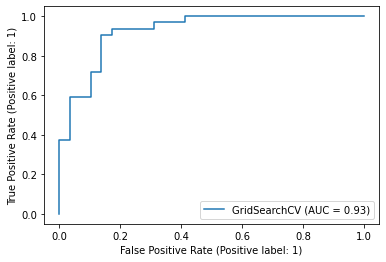

In [32]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

[[25  4]
 [ 3 29]]


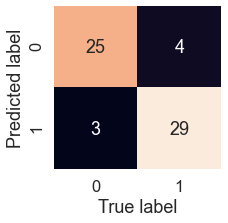

In [33]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel('Predicted label')

plot_confusion_matrix(y_test, y_preds)

Now we've got a ROC curve , an AUC and a congusion matrix, let's get a classification report as as cross-validated precision, recall and f1-score

In [34]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're goint to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score()'

In [35]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [37]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [38]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [39]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [40]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

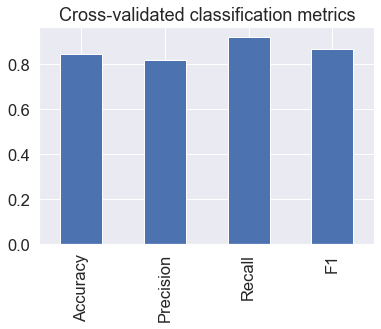

In [41]:
# visualize cross-validation metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                            'Precision': cv_precision,
                            'Recall': cv_recall,
                            'F1': cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                        legend=False);

 ## Feature importance

 Feature importance is another as asking, 'which features contributed most to the outcomes of the model and how did they contribute?'

Finding feature importance is different for each ML model. One way to find is to search for '(MODEL NAME) feature importance'

Let's find the feature importance for our LogisticRegression model...

In [42]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [43]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [44]:
# Match  coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

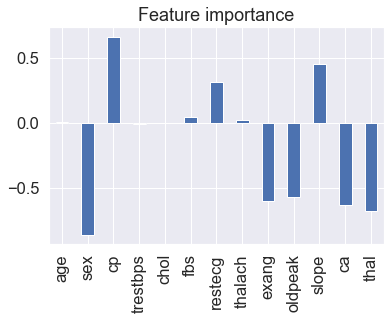

In [45]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature importance', legend=False);

In [46]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [47]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experimentation
If you haven't hit your evaluateion metric yet... ask yourself...

* Could you collect mode data?
* Could you try a better model? Like CatBoost or XGboost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluatin metric) how would you export it and share it with others?